In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer,\
StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.decomposition import PCA

#### Import data

In [72]:
df = pd.read_excel('test.xlsx', header=0)

In [73]:
df.head(n=3)

,produkt,sklep,Tydzień,sprzedaż (szt.),cena,ekspozycja TYP1,ekspozycja TYP2,ekspozycja TYP3,ekspozycja TYP4,ekspozycja TYP5,ekspozycja TYP6,ekspozycja TYP7,ekspozycja TYP8,ekspozycja TYP9
0,p1,s211,2017-08-24,608,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p1,s211,2017-08-31,548,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p1,s211,2017-09-07,1062,2.90481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Change data names and order

In [74]:
df.columns = ['produkt','sklep','tydzien','sprzedaz','cena',
              'typ1','typ2','typ3','typ4','typ5','typ6','typ7','typ8','typ9',]

df = df[['sprzedaz', 'produkt','sklep','tydzien','cena',
         'typ1','typ2','typ3','typ4','typ5','typ6','typ7','typ8','typ9']]

In [75]:
df = df.sort_values(by='tydzien')

In [87]:
display(df.head(n=3))
display(df.tail(n=3))

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
261351,97.0,p8,s29,2017-08-17,33,2.672680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
258335,202.0,p8,s234,2017-08-17,33,2.586931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82575,109.0,p3,s206,2017-08-17,33,1.717523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
409238,27.0,p13,s37,2019-08-08,32,1.723333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96302,101.0,p3,s32,2019-08-08,32,2.188119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413606,16.0,p13,s241,2019-08-08,32,1.833750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### zmienna nr tyg

In [86]:
weeks = [date.week for date in df['tydzien']]
df.insert(column='nr_tyg', loc=4, value=weeks)

In [88]:
df.duplicated().value_counts()

False    412567
dtype: int64

In [89]:
df = df.drop_duplicates()

In [90]:
df.duplicated().value_counts()

False    412567
dtype: int64

### Brakujące wartości

#### Zmienne numeryczne:
* sprzedaz: 413479, 413522 - brak wartości
* cena: 413521 - przecinek zamiast kropki
* typ ekspozycji od 1 do 9: ok


In [101]:
numerical = ['sprzedaz', 'cena', 'typ1','typ2','typ3',
             'typ4','typ5','typ6','typ7','typ8','typ9']

for var in numerical:
    var_num = pd.to_numeric(df[var], errors='coerce')
    if var_num.isnull().any():
        display(df[var_num.isnull()])
    else: print(var+': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


#### Zmienne kategoryczne
* sklep: ok 
* produkt: ok

In [81]:
categorical = ['sklep', 'produkt']
    
for var in categorical:
    if df[var].isnull().any():
        display(df[var].isnull())
    else: print(var+': ok')

sklep: ok
produkt: ok


#### Zamiana numerycznych na typ float

In [82]:
for var in numerical:
    var_num = pd.to_numeric(df[var], errors='coerce')
    df[var] = var_num

* 413479, 413522 - uzupełnić podobnym
* 413521 - zmienić na kropkę

In [100]:
df[(df['produkt']=='p13') & (df['sklep']=='s241') & (df['nr_tyg']==52)]
df[(df['produkt']=='p13') & (df['sklep']=='s150') & (df['nr_tyg']==9)]

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413427,42.0,p13,s150,2018-03-01,9,1.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413479,42.0,p13,s150,2019-02-28,9,1.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#df = df.drop([413479, 413522])
df['cena'][413521] = 1.69
df['sprzedaz'][[413522]]=17.0
df['sprzedaz'][[413479]]=42.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Czy są wartości mniejsze od 0

In [108]:
for var in numerical:
    if (df[var]<0).any():
        display(df[df[var]<0])
    else: print(var + ': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


* 413439 - uzupełnić podobnym
* 41357 - zmienić na 0

In [106]:
display(df[(df['produkt']=='p13') & (df['sklep']=='s241') & (df['nr_tyg']==47)])
df[(df['produkt']=='p13') & (df['nr_tyg']==21)]['sprzedaz'].median()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413517,13.0,p13,s241,2017-11-23,47,1.690000,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413569,17.0,p13,s241,2018-11-22,47,1.866471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


86.0

In [107]:
df['typ2'][413517] = 0
df['sprzedaz'][413439] = 86.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
for var in numerical:
    if (df[var]<0).any():
        display(df[df[var]<0])
    else: print(var + ': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


#### Czy ilość ekspozycji danego typu jest int

In [18]:
for i in range(1, 10):
    a = df['typ'+str(i)].value_counts()
    print('typ'+str(i)+':\n', a)

typ1:
 0.00    406674
1.00      5552
2.00       206
0.50        44
3.00        26
1.10        11
0.25         9
1.50         7
4.00         5
0.75         4
0.60         3
6.00         3
0.80         3
1.20         3
1.25         2
0.16         2
5.00         2
2.20         2
0.34         2
2.50         1
0.30         1
1.30         1
0.70         1
Name: typ1, dtype: int64
typ2:
 0.00    411960
1.00       569
2.00        25
5.00         3
0.50         2
3.00         2
0.25         1
1.50         1
4.00         1
Name: typ2, dtype: int64
typ3:
 0.00    411900
1.00       594
2.00        32
0.50        12
3.00         6
1.50         5
0.70         3
0.08         2
0.34         2
0.17         2
0.42         1
0.25         1
1.80         1
5.00         1
0.30         1
2.50         1
Name: typ3, dtype: int64
typ4:
 0.00    410541
1.00      1963
0.50        22
2.00        17
0.34         8
0.17         5
3.00         2
0.25         1
0.33         1
1.50         1
1.32         1
4.00        

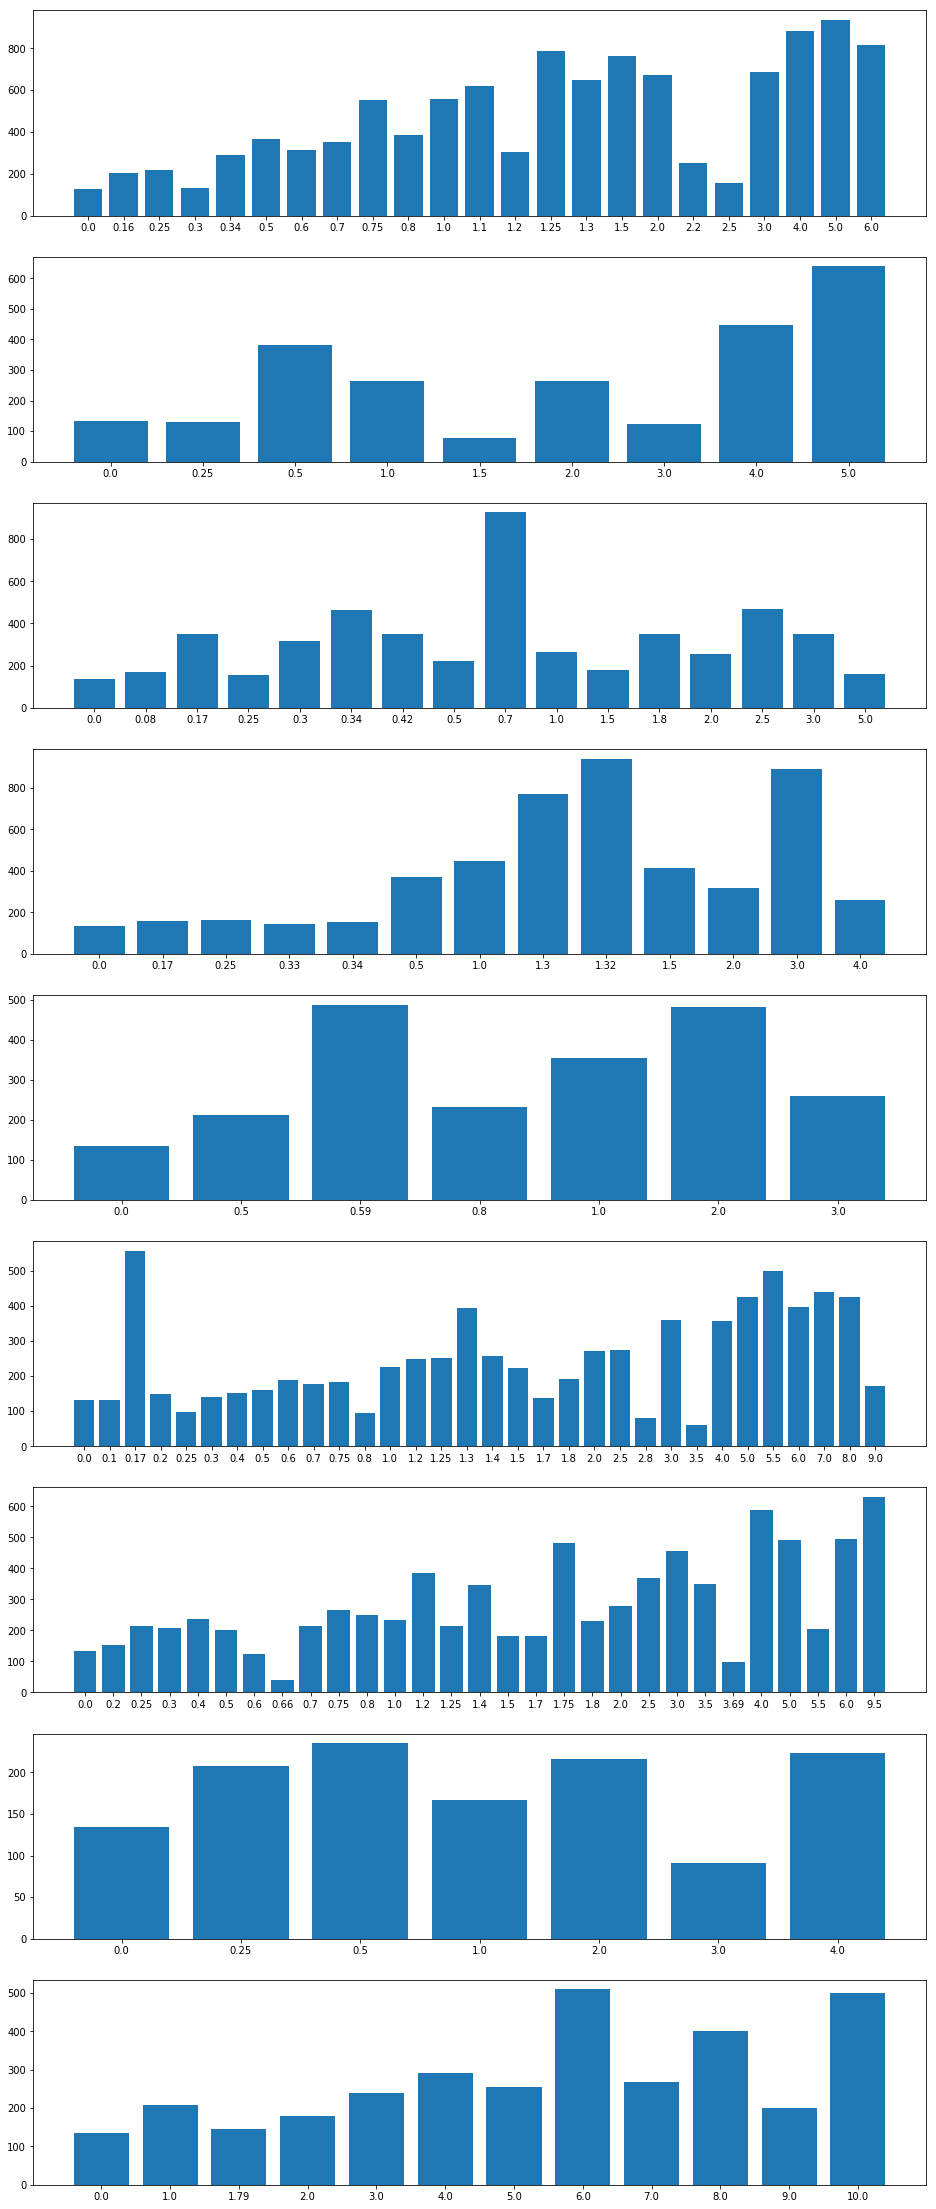

In [19]:
zero = df['sprzedaz'][df['typ7']==0].median()
jeden = df['sprzedaz'][df['typ7']==1].median()
dwa = df['sprzedaz'][df['typ7']==2].median()

heights, e_number = [], []

for typ in range(1, 10):
    h, n = [], []
    for e in np.unique(df['typ' + str(typ)]):
        h.append(df['sprzedaz'][df['typ' + str(typ)]==e].mean())
        n.append(str(e))
    heights.append(h)
    e_number.append(n)
    
fig, ax = plt.subplots(nrows=9)
for bar in range(0, 9):
    ax[bar].bar(e_number[bar], heights[bar])
fig.set_size_inches([16,40])

#### nie int w ilości ekspozycji - usunąć

In [544]:
selects = []
for typ in range(1, 10):
    l = []
    for n in range(0, 11):
        t = df['typ' + str(typ)] == n
        l.append(t)
    select = l[0]|l[1]|l[2]|l[3]|l[4]|l[5]|l[6]|l[7]|l[8]|l[9]|l[10]
    selects.append(select)

In [545]:
final_select = selects[0]&selects[1]&selects[2]&selects[3]&selects[4]&selects[5]&selects[6]&selects[7]&selects[8] 

In [546]:
final_select.value_counts()

True     411748
False       816
dtype: int64

In [547]:
'''df = df[final_select]'''

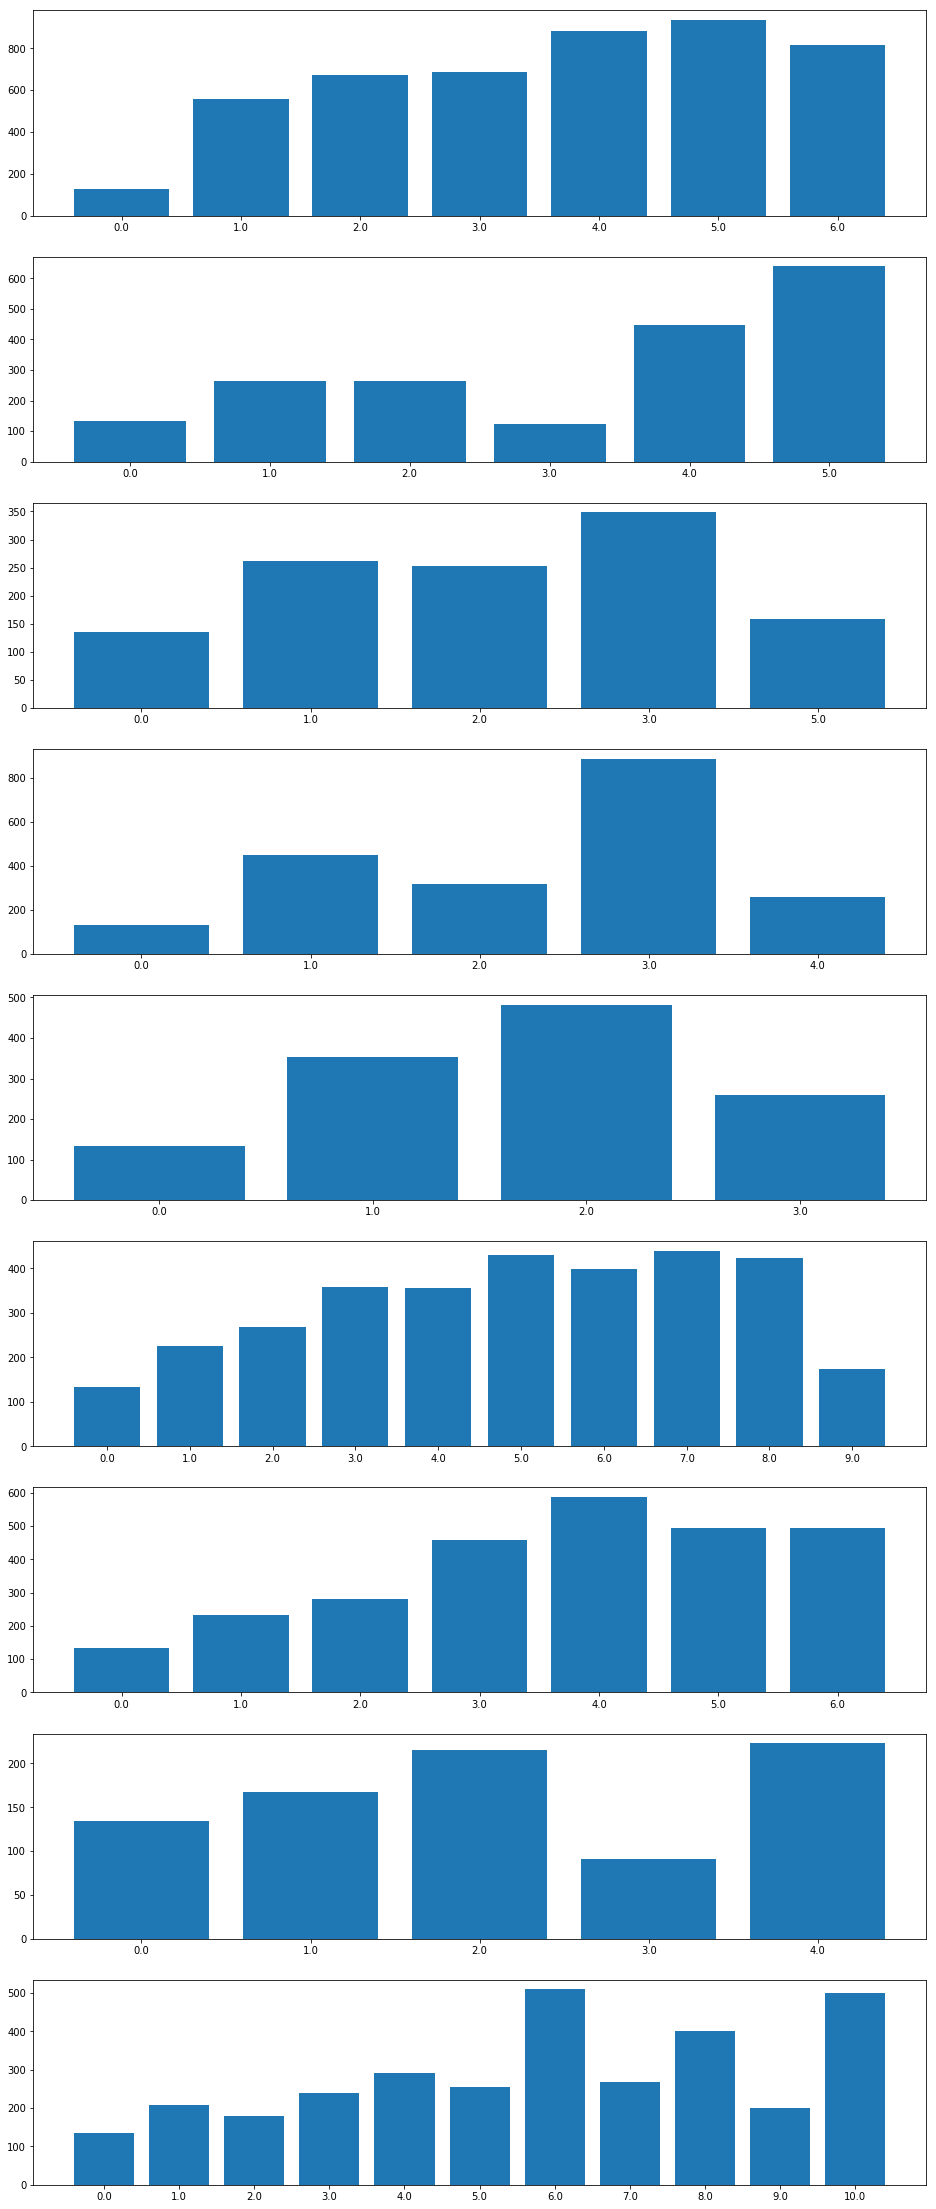

In [548]:
heights, e_number = [], []

for typ in range(1, 10):
    h, n = [], []
    for e in np.unique(df['typ' + str(typ)]):
        h.append(df['sprzedaz'][df['typ' + str(typ)]==e].mean())
        n.append(str(e))
    heights.append(h)
    e_number.append(n)
    
fig, ax = plt.subplots(nrows=9)
for bar in range(0, 9):
    ax[bar].bar(e_number[bar], heights[bar])
fig.set_size_inches([16,40])

#### sklep, produkt

In [110]:
print(np.unique(df['sklep']).shape[0])
print(np.unique(df['produkt']).shape[0])

343
13


#### cena outliers

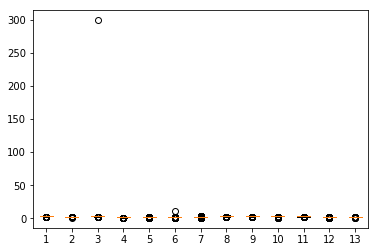

In [111]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [112]:
df['cena'].nlargest(n=5)

227       299.000000
413397     10.400000
134363      4.650000
109403      4.584903
120115      4.574483
Name: cena, dtype: float64

#### zamienic 299 i 10.40 na mediane

In [131]:
display(df[df['cena']==10.40])
display(df[df['cena']==299])

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413397,26.0,p13,s145,2019-08-01,31,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
227,488.0,p1,s90,2018-01-04,1,299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
display(df[(df['produkt']=='p13') & (df['nr_tyg']==31)]['cena'].median())
df[(df['produkt']=='p1') & (df['nr_tyg']==1)]['cena'].median()

1.87963636363636

3.004730357142855

In [138]:
df['cena'][227] = 1.87
df['cena'][413397] = 3.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
df['cena'].nlargest(n=5)
#df=df.drop([227, 413397])

134363    4.650000
109403    4.584903
120115    4.574483
109404    4.571507
112003    4.567320
Name: cena, dtype: float64

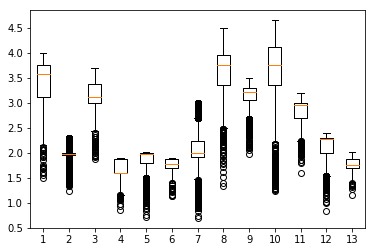

In [553]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

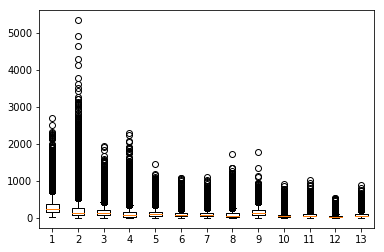

In [184]:
produkt_sprzedaz = [df['sprzedaz'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_sprzedaz)
plt.show()

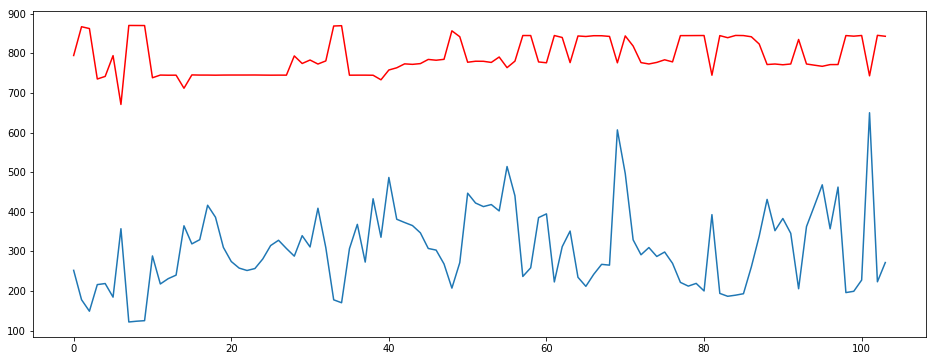

In [171]:
fig, ax = plt.subplots()
ax.plot(range(104), p1s211.groupby('tydzien')['cena'].mean() * 250, color='r')
ax.plot(range(104), p1s211.groupby('tydzien')['sprzedaz'].mean())
fig.set_size_inches([16, 6])

In [238]:
pca = PCA(n_components=150)

In [152]:
weeks = df['tydzien'].unique()
products = df['produkt'].unique()
shops = df['sklep'].unique()
pw = []
for p in products:
    shops_week = [df[(df['tydzien']==week) & (df['produkt']=='p1')]['sklep'].unique().shape[0] for week in weeks]
    pw.append(shops_week)

In [143]:
pw = np.array(pw)
for i in range(13):
    print(np.unique(pw[i, 0]!=343))

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [164]:
p1 = df[df['produkt']=='p1']
p1df = pd.DataFrame(columns=shops, data=np.zeros([weeks[1:].size, shops.size]))
for i, week in enumerate(weeks[1:]):
    week_df = p1[p1['tydzien']==week]
    for shop in shops:
        print(shop, i)
        p1df[shop][i] = week_df[week_df['sklep']==shop]['cena']

s29 0
s234 0
s206 0
s3 0
s293 0
s34 0
s303 0
s105 0
s254 0
s195 0
s236 0
s237 0
s276 0
s154 0
s343 0
s202 0
s7 0
s88 0
s60 0
s156 0
s45 0
s286 0
s16 0
s84 0
s2 0
s18 0
s151 0
s15 0
s4 0
s110 0
s149 0
s61 0
s250 0
s252 0
s148 0
s287 0
s10 0
s167 0
s65 0
s161 0
s325 0
s341 0
s327 0
s289 0
s301 0
s68 0
s208 0
s312 0
s307 0
s121 0
s323 0
s203 0
s333 0
s146 0
s164 0
s89 0
s31 0
s187 0
s221 0
s59 0
s259 0
s226 0
s235 0
s225 0
s193 0
s337 0
s340 0
s248 0
s103 0
s50 0
s62 0
s181 0
s132 0
s22 0
s104 0
s267 0
s216 0
s64 0
s179 0
s232 0
s305 0
s260 0
s222 0
s242 0
s24 0
s320 0
s297 0
s319 0
s182 0
s96 0
s80 0
s258 0
s69 0
s292 0
s41 0
s99 0
s46 0
s207 0
s313 0
s14 0
s152 0
s332 0
s310 0
s186 0
s133 0
s188 0
s144 0
s43 0
s63 0
s334 0
s175 0
s283 0
s119 0
s285 0
s183 0
s111 0
s284 0
s191 0
s134 0
s266 0
s277 0
s83 0
s180 0
s77 0
s39 0
s218 0
s302 0
s47 0
s243 0
s30 0
s165 0
s94 0
s189 0
s139 0
s23 0
s66 0
s106 0
s192 0
s26 0
s253 0
s338 0
s140 0
s200 0
s48 0
s322 0
s231 0
s25 0
s38 0
s81 0
s102 0
s

s278 3
s42 3
s74 3
s177 3
s174 3
s143 3
s113 3
s239 3
s166 3
s13 3
s233 3
s224 3
s220 3
s240 3
s85 3
s296 3
s157 3
s213 3
s271 3
s160 3
s272 3
s247 3
s90 3
s212 3
s245 3
s291 3
s214 3
s270 3
s178 3
s147 3
s264 3
s241 3
s230 3
s211 3
s217 3
s86 3
s29 4
s234 4
s206 4
s3 4
s293 4
s34 4
s303 4
s105 4
s254 4
s195 4
s236 4
s237 4
s276 4
s154 4
s343 4
s202 4
s7 4
s88 4
s60 4
s156 4
s45 4
s286 4
s16 4
s84 4
s2 4
s18 4
s151 4
s15 4
s4 4
s110 4
s149 4
s61 4
s250 4
s252 4
s148 4
s287 4
s10 4
s167 4
s65 4
s161 4
s325 4
s341 4
s327 4
s289 4
s301 4
s68 4
s208 4
s312 4
s307 4
s121 4
s323 4
s203 4
s333 4
s146 4
s164 4
s89 4
s31 4
s187 4
s221 4
s59 4
s259 4
s226 4
s235 4
s225 4
s193 4
s337 4
s340 4
s248 4
s103 4
s50 4
s62 4
s181 4
s132 4
s22 4
s104 4
s267 4
s216 4
s64 4
s179 4
s232 4
s305 4
s260 4
s222 4
s242 4
s24 4
s320 4
s297 4
s319 4
s182 4
s96 4
s80 4
s258 4
s69 4
s292 4
s41 4
s99 4
s46 4
s207 4
s313 4
s14 4
s152 4
s332 4
s310 4
s186 4
s133 4
s188 4
s144 4
s43 4
s63 4
s334 4
s175 4
s283 4
s119 4
s

s288 7
s114 7
s142 7
s162 7
s116 7
s163 7
s201 7
s326 7
s158 7
s8 7
s324 7
s169 7
s199 7
s315 7
s196 7
s229 7
s135 7
s335 7
s53 7
s51 7
s123 7
s137 7
s153 7
s316 7
s190 7
s55 7
s219 7
s265 7
s136 7
s17 7
s249 7
s118 7
s75 7
s282 7
s256 7
s295 7
s223 7
s71 7
s100 7
s159 7
s21 7
s274 7
s173 7
s20 7
s228 7
s72 7
s311 7
s308 7
s145 7
s342 7
s290 7
s257 7
s150 7
s141 7
s176 7
s95 7
s128 7
s278 7
s42 7
s74 7
s177 7
s174 7
s143 7
s113 7
s239 7
s166 7
s13 7
s233 7
s224 7
s220 7
s240 7
s85 7
s296 7
s157 7
s213 7
s271 7
s160 7
s272 7
s247 7
s90 7
s212 7
s245 7
s291 7
s214 7
s270 7
s178 7
s147 7
s264 7
s241 7
s230 7
s211 7
s217 7
s86 7
s29 8
s234 8
s206 8
s3 8
s293 8
s34 8
s303 8
s105 8
s254 8
s195 8
s236 8
s237 8
s276 8
s154 8
s343 8
s202 8
s7 8
s88 8
s60 8
s156 8
s45 8
s286 8
s16 8
s84 8
s2 8
s18 8
s151 8
s15 8
s4 8
s110 8
s149 8
s61 8
s250 8
s252 8
s148 8
s287 8
s10 8
s167 8
s65 8
s161 8
s325 8
s341 8
s327 8
s289 8
s301 8
s68 8
s208 8
s312 8
s307 8
s121 8
s323 8
s203 8
s333 8
s146 8
s164 8
s89

s127 11
s168 11
s120 11
s87 11
s49 11
s129 11
s93 11
s197 11
s56 11
s125 11
s138 11
s204 11
s261 11
s57 11
s185 11
s336 11
s246 11
s298 11
s28 11
s317 11
s78 11
s112 11
s124 11
s329 11
s279 11
s215 11
s1 11
s321 11
s330 11
s19 11
s131 11
s300 11
s273 11
s58 11
s27 11
s36 11
s275 11
s170 11
s281 11
s194 11
s52 11
s304 11
s155 11
s294 11
s98 11
s288 11
s114 11
s142 11
s162 11
s116 11
s163 11
s201 11
s326 11
s158 11
s8 11
s324 11
s169 11
s199 11
s315 11
s196 11
s229 11
s135 11
s335 11
s53 11
s51 11
s123 11
s137 11
s153 11
s316 11
s190 11
s55 11
s219 11
s265 11
s136 11
s17 11
s249 11
s118 11
s75 11
s282 11
s256 11
s295 11
s223 11
s71 11
s100 11
s159 11
s21 11
s274 11
s173 11
s20 11
s228 11
s72 11
s311 11
s308 11
s145 11
s342 11
s290 11
s257 11
s150 11
s141 11
s176 11
s95 11
s128 11
s278 11
s42 11
s74 11
s177 11
s174 11
s143 11
s113 11
s239 11
s166 11
s13 11
s233 11
s224 11
s220 11
s240 11
s85 11
s296 11
s157 11
s213 11
s271 11
s160 11
s272 11
s247 11
s90 11
s212 11
s245 11
s291 11
s214 11


s272 14
s247 14
s90 14
s212 14
s245 14
s291 14
s214 14
s270 14
s178 14
s147 14
s264 14
s241 14
s230 14
s211 14
s217 14
s86 14
s29 15
s234 15
s206 15
s3 15
s293 15
s34 15
s303 15
s105 15
s254 15
s195 15
s236 15
s237 15
s276 15
s154 15
s343 15
s202 15
s7 15
s88 15
s60 15
s156 15
s45 15
s286 15
s16 15
s84 15
s2 15
s18 15
s151 15
s15 15
s4 15
s110 15
s149 15
s61 15
s250 15
s252 15
s148 15
s287 15
s10 15
s167 15
s65 15
s161 15
s325 15
s341 15
s327 15
s289 15
s301 15
s68 15
s208 15
s312 15
s307 15
s121 15
s323 15
s203 15
s333 15
s146 15
s164 15
s89 15
s31 15
s187 15
s221 15
s59 15
s259 15
s226 15
s235 15
s225 15
s193 15
s337 15
s340 15
s248 15
s103 15
s50 15
s62 15
s181 15
s132 15
s22 15
s104 15
s267 15
s216 15
s64 15
s179 15
s232 15
s305 15
s260 15
s222 15
s242 15
s24 15
s320 15
s297 15
s319 15
s182 15
s96 15
s80 15
s258 15
s69 15
s292 15
s41 15
s99 15
s46 15
s207 15
s313 15
s14 15
s152 15
s332 15
s310 15
s186 15
s133 15
s188 15
s144 15
s43 15
s63 15
s334 15
s175 15
s283 15
s119 15
s285 15


s277 18
s83 18
s180 18
s77 18
s39 18
s218 18
s302 18
s47 18
s243 18
s30 18
s165 18
s94 18
s189 18
s139 18
s23 18
s66 18
s106 18
s192 18
s26 18
s253 18
s338 18
s140 18
s200 18
s48 18
s322 18
s231 18
s25 18
s38 18
s81 18
s102 18
s79 18
s6 18
s251 18
s210 18
s238 18
s122 18
s130 18
s67 18
s209 18
s299 18
s92 18
s331 18
s5 18
s263 18
s115 18
s309 18
s109 18
s108 18
s255 18
s35 18
s40 18
s205 18
s306 18
s91 18
s171 18
s70 18
s339 18
s76 18
s198 18
s101 18
s314 18
s244 18
s82 18
s33 18
s268 18
s9 18
s97 18
s172 18
s269 18
s44 18
s280 18
s328 18
s12 18
s227 18
s11 18
s107 18
s262 18
s117 18
s54 18
s126 18
s184 18
s73 18
s318 18
s32 18
s37 18
s127 18
s168 18
s120 18
s87 18
s49 18
s129 18
s93 18
s197 18
s56 18
s125 18
s138 18
s204 18
s261 18
s57 18
s185 18
s336 18
s246 18
s298 18
s28 18
s317 18
s78 18
s112 18
s124 18
s329 18
s279 18
s215 18
s1 18
s321 18
s330 18
s19 18
s131 18
s300 18
s273 18
s58 18
s27 18
s36 18
s275 18
s170 18
s281 18
s194 18
s52 18
s304 18
s155 18
s294 18
s98 18
s288 18
s114

s116 21
s163 21
s201 21
s326 21
s158 21
s8 21
s324 21
s169 21
s199 21
s315 21
s196 21
s229 21
s135 21
s335 21
s53 21
s51 21
s123 21
s137 21
s153 21
s316 21
s190 21
s55 21
s219 21
s265 21
s136 21
s17 21
s249 21
s118 21
s75 21
s282 21
s256 21
s295 21
s223 21
s71 21
s100 21
s159 21
s21 21
s274 21
s173 21
s20 21
s228 21
s72 21
s311 21
s308 21
s145 21
s342 21
s290 21
s257 21
s150 21
s141 21
s176 21
s95 21
s128 21
s278 21
s42 21
s74 21
s177 21
s174 21
s143 21
s113 21
s239 21
s166 21
s13 21
s233 21
s224 21
s220 21
s240 21
s85 21
s296 21
s157 21
s213 21
s271 21
s160 21
s272 21
s247 21
s90 21
s212 21
s245 21
s291 21
s214 21
s270 21
s178 21
s147 21
s264 21
s241 21
s230 21
s211 21
s217 21
s86 21
s29 22
s234 22
s206 22
s3 22
s293 22
s34 22
s303 22
s105 22
s254 22
s195 22
s236 22
s237 22
s276 22
s154 22
s343 22
s202 22
s7 22
s88 22
s60 22
s156 22
s45 22
s286 22
s16 22
s84 22
s2 22
s18 22
s151 22
s15 22
s4 22
s110 22
s149 22
s61 22
s250 22
s252 22
s148 22
s287 22
s10 22
s167 22
s65 22
s161 22
s325 2

s149 25
s61 25
s250 25
s252 25
s148 25
s287 25
s10 25
s167 25
s65 25
s161 25
s325 25
s341 25
s327 25
s289 25
s301 25
s68 25
s208 25
s312 25
s307 25
s121 25
s323 25
s203 25
s333 25
s146 25
s164 25
s89 25
s31 25
s187 25
s221 25
s59 25
s259 25
s226 25
s235 25
s225 25
s193 25
s337 25
s340 25
s248 25
s103 25
s50 25
s62 25
s181 25
s132 25
s22 25
s104 25
s267 25
s216 25
s64 25
s179 25
s232 25
s305 25
s260 25
s222 25
s242 25
s24 25
s320 25
s297 25
s319 25
s182 25
s96 25
s80 25
s258 25
s69 25
s292 25
s41 25
s99 25
s46 25
s207 25
s313 25
s14 25
s152 25
s332 25
s310 25
s186 25
s133 25
s188 25
s144 25
s43 25
s63 25
s334 25
s175 25
s283 25
s119 25
s285 25
s183 25
s111 25
s284 25
s191 25
s134 25
s266 25
s277 25
s83 25
s180 25
s77 25
s39 25
s218 25
s302 25
s47 25
s243 25
s30 25
s165 25
s94 25
s189 25
s139 25
s23 25
s66 25
s106 25
s192 25
s26 25
s253 25
s338 25
s140 25
s200 25
s48 25
s322 25
s231 25
s25 25
s38 25
s81 25
s102 25
s79 25
s6 25
s251 25
s210 25
s238 25
s122 25
s130 25
s67 25
s209 25
s299 2

s210 28
s238 28
s122 28
s130 28
s67 28
s209 28
s299 28
s92 28
s331 28
s5 28
s263 28
s115 28
s309 28
s109 28
s108 28
s255 28
s35 28
s40 28
s205 28
s306 28
s91 28
s171 28
s70 28
s339 28
s76 28
s198 28
s101 28
s314 28
s244 28
s82 28
s33 28
s268 28
s9 28
s97 28
s172 28
s269 28
s44 28
s280 28
s328 28
s12 28
s227 28
s11 28
s107 28
s262 28
s117 28
s54 28
s126 28
s184 28
s73 28
s318 28
s32 28
s37 28
s127 28
s168 28
s120 28
s87 28
s49 28
s129 28
s93 28
s197 28
s56 28
s125 28
s138 28
s204 28
s261 28
s57 28
s185 28
s336 28
s246 28
s298 28
s28 28
s317 28
s78 28
s112 28
s124 28
s329 28
s279 28
s215 28
s1 28
s321 28
s330 28
s19 28
s131 28
s300 28
s273 28
s58 28
s27 28
s36 28
s275 28
s170 28
s281 28
s194 28
s52 28
s304 28
s155 28
s294 28
s98 28
s288 28
s114 28
s142 28
s162 28
s116 28
s163 28
s201 28
s326 28
s158 28
s8 28
s324 28
s169 28
s199 28
s315 28
s196 28
s229 28
s135 28
s335 28
s53 28
s51 28
s123 28
s137 28
s153 28
s316 28
s190 28
s55 28
s219 28
s265 28
s136 28
s17 28
s249 28
s118 28
s75 28
s28

s75 31
s282 31
s256 31
s295 31
s223 31
s71 31
s100 31
s159 31
s21 31
s274 31
s173 31
s20 31
s228 31
s72 31
s311 31
s308 31
s145 31
s342 31
s290 31
s257 31
s150 31
s141 31
s176 31
s95 31
s128 31
s278 31
s42 31
s74 31
s177 31
s174 31
s143 31
s113 31
s239 31
s166 31
s13 31
s233 31
s224 31
s220 31
s240 31
s85 31
s296 31
s157 31
s213 31
s271 31
s160 31
s272 31
s247 31
s90 31
s212 31
s245 31
s291 31
s214 31
s270 31
s178 31
s147 31
s264 31
s241 31
s230 31
s211 31
s217 31
s86 31
s29 32
s234 32
s206 32
s3 32
s293 32
s34 32
s303 32
s105 32
s254 32
s195 32
s236 32
s237 32
s276 32
s154 32
s343 32
s202 32
s7 32
s88 32
s60 32
s156 32
s45 32
s286 32
s16 32
s84 32
s2 32
s18 32
s151 32
s15 32
s4 32
s110 32
s149 32
s61 32
s250 32
s252 32
s148 32
s287 32
s10 32
s167 32
s65 32
s161 32
s325 32
s341 32
s327 32
s289 32
s301 32
s68 32
s208 32
s312 32
s307 32
s121 32
s323 32
s203 32
s333 32
s146 32
s164 32
s89 32
s31 32
s187 32
s221 32
s59 32
s259 32
s226 32
s235 32
s225 32
s193 32
s337 32
s340 32
s248 32
s103

s181 35
s132 35
s22 35
s104 35
s267 35
s216 35
s64 35
s179 35
s232 35
s305 35
s260 35
s222 35
s242 35
s24 35
s320 35
s297 35
s319 35
s182 35
s96 35
s80 35
s258 35
s69 35
s292 35
s41 35
s99 35
s46 35
s207 35
s313 35
s14 35
s152 35
s332 35
s310 35
s186 35
s133 35
s188 35
s144 35
s43 35
s63 35
s334 35
s175 35
s283 35
s119 35
s285 35
s183 35
s111 35
s284 35
s191 35
s134 35
s266 35
s277 35
s83 35
s180 35
s77 35
s39 35
s218 35
s302 35
s47 35
s243 35
s30 35
s165 35
s94 35
s189 35
s139 35
s23 35
s66 35
s106 35
s192 35
s26 35
s253 35
s338 35
s140 35
s200 35
s48 35
s322 35
s231 35
s25 35
s38 35
s81 35
s102 35
s79 35
s6 35
s251 35
s210 35
s238 35
s122 35
s130 35
s67 35
s209 35
s299 35
s92 35
s331 35
s5 35
s263 35
s115 35
s309 35
s109 35
s108 35
s255 35
s35 35
s40 35
s205 35
s306 35
s91 35
s171 35
s70 35
s339 35
s76 35
s198 35
s101 35
s314 35
s244 35
s82 35
s33 35
s268 35
s9 35
s97 35
s172 35
s269 35
s44 35
s280 35
s328 35
s12 35
s227 35
s11 35
s107 35
s262 35
s117 35
s54 35
s126 35
s184 35
s73 35

s12 38
s227 38
s11 38
s107 38
s262 38
s117 38
s54 38
s126 38
s184 38
s73 38
s318 38
s32 38
s37 38
s127 38
s168 38
s120 38
s87 38
s49 38
s129 38
s93 38
s197 38
s56 38
s125 38
s138 38
s204 38
s261 38
s57 38
s185 38
s336 38
s246 38
s298 38
s28 38
s317 38
s78 38
s112 38
s124 38
s329 38
s279 38
s215 38
s1 38
s321 38
s330 38
s19 38
s131 38
s300 38
s273 38
s58 38
s27 38
s36 38
s275 38
s170 38
s281 38
s194 38
s52 38
s304 38
s155 38
s294 38
s98 38
s288 38
s114 38
s142 38
s162 38
s116 38
s163 38
s201 38
s326 38
s158 38
s8 38
s324 38
s169 38
s199 38
s315 38
s196 38
s229 38
s135 38
s335 38
s53 38
s51 38
s123 38
s137 38
s153 38
s316 38
s190 38
s55 38
s219 38
s265 38
s136 38
s17 38
s249 38
s118 38
s75 38
s282 38
s256 38
s295 38
s223 38
s71 38
s100 38
s159 38
s21 38
s274 38
s173 38
s20 38
s228 38
s72 38
s311 38
s308 38
s145 38
s342 38
s290 38
s257 38
s150 38
s141 38
s176 38
s95 38
s128 38
s278 38
s42 38
s74 38
s177 38
s174 38
s143 38
s113 38
s239 38
s166 38
s13 38
s233 38
s224 38
s220 38
s240 38
s85 

s90 41
s212 41
s245 41
s291 41
s214 41
s270 41
s178 41
s147 41
s264 41
s241 41
s230 41
s211 41
s217 41
s86 41
s29 42
s234 42
s206 42
s3 42
s293 42
s34 42
s303 42
s105 42
s254 42
s195 42
s236 42
s237 42
s276 42
s154 42
s343 42
s202 42
s7 42
s88 42
s60 42
s156 42
s45 42
s286 42
s16 42
s84 42
s2 42
s18 42
s151 42
s15 42
s4 42
s110 42
s149 42
s61 42
s250 42
s252 42
s148 42
s287 42
s10 42
s167 42
s65 42
s161 42
s325 42
s341 42
s327 42
s289 42
s301 42
s68 42
s208 42
s312 42
s307 42
s121 42
s323 42
s203 42
s333 42
s146 42
s164 42
s89 42
s31 42
s187 42
s221 42
s59 42
s259 42
s226 42
s235 42
s225 42
s193 42
s337 42
s340 42
s248 42
s103 42
s50 42
s62 42
s181 42
s132 42
s22 42
s104 42
s267 42
s216 42
s64 42
s179 42
s232 42
s305 42
s260 42
s222 42
s242 42
s24 42
s320 42
s297 42
s319 42
s182 42
s96 42
s80 42
s258 42
s69 42
s292 42
s41 42
s99 42
s46 42
s207 42
s313 42
s14 42
s152 42
s332 42
s310 42
s186 42
s133 42
s188 42
s144 42
s43 42
s63 42
s334 42
s175 42
s283 42
s119 42
s285 42
s183 42
s111 42


s331 45
s5 45
s263 45
s115 45
s309 45
s109 45
s108 45
s255 45
s35 45
s40 45
s205 45
s306 45
s91 45
s171 45
s70 45
s339 45
s76 45
s198 45
s101 45
s314 45
s244 45
s82 45
s33 45
s268 45
s9 45
s97 45
s172 45
s269 45
s44 45
s280 45
s328 45
s12 45
s227 45
s11 45
s107 45
s262 45
s117 45
s54 45
s126 45
s184 45
s73 45
s318 45
s32 45
s37 45
s127 45
s168 45
s120 45
s87 45
s49 45
s129 45
s93 45
s197 45
s56 45
s125 45
s138 45
s204 45
s261 45
s57 45
s185 45
s336 45
s246 45
s298 45
s28 45
s317 45
s78 45
s112 45
s124 45
s329 45
s279 45
s215 45
s1 45
s321 45
s330 45
s19 45
s131 45
s300 45
s273 45
s58 45
s27 45
s36 45
s275 45
s170 45
s281 45
s194 45
s52 45
s304 45
s155 45
s294 45
s98 45
s288 45
s114 45
s142 45
s162 45
s116 45
s163 45
s201 45
s326 45
s158 45
s8 45
s324 45
s169 45
s199 45
s315 45
s196 45
s229 45
s135 45
s335 45
s53 45
s51 45
s123 45
s137 45
s153 45
s316 45
s190 45
s55 45
s219 45
s265 45
s136 45
s17 45
s249 45
s118 45
s75 45
s282 45
s256 45
s295 45
s223 45
s71 45
s100 45
s159 45
s21 45
s27

s291 48
s214 48
s270 48
s178 48
s147 48
s264 48
s241 48
s230 48
s211 48
s217 48
s86 48
s29 49
s234 49
s206 49
s3 49
s293 49
s34 49
s303 49
s105 49
s254 49
s195 49
s236 49
s237 49
s276 49
s154 49
s343 49
s202 49
s7 49
s88 49
s60 49
s156 49
s45 49
s286 49
s16 49
s84 49
s2 49
s18 49
s151 49
s15 49
s4 49
s110 49
s149 49
s61 49
s250 49
s252 49
s148 49
s287 49
s10 49
s167 49
s65 49
s161 49
s325 49
s341 49
s327 49
s289 49
s301 49
s68 49
s208 49
s312 49
s307 49
s121 49
s323 49
s203 49
s333 49
s146 49
s164 49
s89 49
s31 49
s187 49
s221 49
s59 49
s259 49
s226 49
s235 49
s225 49
s193 49
s337 49
s340 49
s248 49
s103 49
s50 49
s62 49
s181 49
s132 49
s22 49
s104 49
s267 49
s216 49
s64 49
s179 49
s232 49
s305 49
s260 49
s222 49
s242 49
s24 49
s320 49
s297 49
s319 49
s182 49
s96 49
s80 49
s258 49
s69 49
s292 49
s41 49
s99 49
s46 49
s207 49
s313 49
s14 49
s152 49
s332 49
s310 49
s186 49
s133 49
s188 49
s144 49
s43 49
s63 49
s334 49
s175 49
s283 49
s119 49
s285 49
s183 49
s111 49
s284 49
s191 49
s134 49

s255 52
s35 52
s40 52
s205 52
s306 52
s91 52
s171 52
s70 52
s339 52
s76 52
s198 52
s101 52
s314 52
s244 52
s82 52
s33 52
s268 52
s9 52
s97 52
s172 52
s269 52
s44 52
s280 52
s328 52
s12 52
s227 52
s11 52
s107 52
s262 52
s117 52
s54 52
s126 52
s184 52
s73 52
s318 52
s32 52
s37 52
s127 52
s168 52
s120 52
s87 52
s49 52
s129 52
s93 52
s197 52
s56 52
s125 52
s138 52
s204 52
s261 52
s57 52
s185 52
s336 52
s246 52
s298 52
s28 52
s317 52
s78 52
s112 52
s124 52
s329 52
s279 52
s215 52
s1 52
s321 52
s330 52
s19 52
s131 52
s300 52
s273 52
s58 52
s27 52
s36 52
s275 52
s170 52
s281 52
s194 52
s52 52
s304 52
s155 52
s294 52
s98 52
s288 52
s114 52
s142 52
s162 52
s116 52
s163 52
s201 52
s326 52
s158 52
s8 52
s324 52
s169 52
s199 52
s315 52
s196 52
s229 52
s135 52
s335 52
s53 52
s51 52
s123 52
s137 52
s153 52
s316 52
s190 52
s55 52
s219 52
s265 52
s136 52
s17 52
s249 52
s118 52
s75 52
s282 52
s256 52
s295 52
s223 52
s71 52
s100 52
s159 52
s21 52
s274 52
s173 52
s20 52
s228 52
s72 52
s311 52
s308 52
s14

s178 55
s147 55
s264 55
s241 55
s230 55
s211 55
s217 55
s86 55
s29 56
s234 56
s206 56
s3 56
s293 56
s34 56
s303 56
s105 56
s254 56
s195 56
s236 56
s237 56
s276 56
s154 56
s343 56
s202 56
s7 56
s88 56
s60 56
s156 56
s45 56
s286 56
s16 56
s84 56
s2 56
s18 56
s151 56
s15 56
s4 56
s110 56
s149 56
s61 56
s250 56
s252 56
s148 56
s287 56
s10 56
s167 56
s65 56
s161 56
s325 56
s341 56
s327 56
s289 56
s301 56
s68 56
s208 56
s312 56
s307 56
s121 56
s323 56
s203 56
s333 56
s146 56
s164 56
s89 56
s31 56
s187 56
s221 56
s59 56
s259 56
s226 56
s235 56
s225 56
s193 56
s337 56
s340 56
s248 56
s103 56
s50 56
s62 56
s181 56
s132 56
s22 56
s104 56
s267 56
s216 56
s64 56
s179 56
s232 56
s305 56
s260 56
s222 56
s242 56
s24 56
s320 56
s297 56
s319 56
s182 56
s96 56
s80 56
s258 56
s69 56
s292 56
s41 56
s99 56
s46 56
s207 56
s313 56
s14 56
s152 56
s332 56
s310 56
s186 56
s133 56
s188 56
s144 56
s43 56
s63 56
s334 56
s175 56
s283 56
s119 56
s285 56
s183 56
s111 56
s284 56
s191 56
s134 56
s266 56
s277 56
s83 56


s299 59
s92 59
s331 59
s5 59
s263 59
s115 59
s309 59
s109 59
s108 59
s255 59
s35 59
s40 59
s205 59
s306 59
s91 59
s171 59
s70 59
s339 59
s76 59
s198 59
s101 59
s314 59
s244 59
s82 59
s33 59
s268 59
s9 59
s97 59
s172 59
s269 59
s44 59
s280 59
s328 59
s12 59
s227 59
s11 59
s107 59
s262 59
s117 59
s54 59
s126 59
s184 59
s73 59
s318 59
s32 59
s37 59
s127 59
s168 59
s120 59
s87 59
s49 59
s129 59
s93 59
s197 59
s56 59
s125 59
s138 59
s204 59
s261 59
s57 59
s185 59
s336 59
s246 59
s298 59
s28 59
s317 59
s78 59
s112 59
s124 59
s329 59
s279 59
s215 59
s1 59
s321 59
s330 59
s19 59
s131 59
s300 59
s273 59
s58 59
s27 59
s36 59
s275 59
s170 59
s281 59
s194 59
s52 59
s304 59
s155 59
s294 59
s98 59
s288 59
s114 59
s142 59
s162 59
s116 59
s163 59
s201 59
s326 59
s158 59
s8 59
s324 59
s169 59
s199 59
s315 59
s196 59
s229 59
s135 59
s335 59
s53 59
s51 59
s123 59
s137 59
s153 59
s316 59
s190 59
s55 59
s219 59
s265 59
s136 59
s17 59
s249 59
s118 59
s75 59
s282 59
s256 59
s295 59
s223 59
s71 59
s100 59
s15

s86 62
s29 63
s234 63
s206 63
s3 63
s293 63
s34 63
s303 63
s105 63
s254 63
s195 63
s236 63
s237 63
s276 63
s154 63
s343 63
s202 63
s7 63
s88 63
s60 63
s156 63
s45 63
s286 63
s16 63
s84 63
s2 63
s18 63
s151 63
s15 63
s4 63
s110 63
s149 63
s61 63
s250 63
s252 63
s148 63
s287 63
s10 63
s167 63
s65 63
s161 63
s325 63
s341 63
s327 63
s289 63
s301 63
s68 63
s208 63
s312 63
s307 63
s121 63
s323 63
s203 63
s333 63
s146 63
s164 63
s89 63
s31 63
s187 63
s221 63
s59 63
s259 63
s226 63
s235 63
s225 63
s193 63
s337 63
s340 63
s248 63
s103 63
s50 63
s62 63
s181 63
s132 63
s22 63
s104 63
s267 63
s216 63
s64 63
s179 63
s232 63
s305 63
s260 63
s222 63
s242 63
s24 63
s320 63
s297 63
s319 63
s182 63
s96 63
s80 63
s258 63
s69 63
s292 63
s41 63
s99 63
s46 63
s207 63
s313 63
s14 63
s152 63
s332 63
s310 63
s186 63
s133 63
s188 63
s144 63
s43 63
s63 63
s334 63
s175 63
s283 63
s119 63
s285 63
s183 63
s111 63
s284 63
s191 63
s134 63
s266 63
s277 63
s83 63
s180 63
s77 63
s39 63
s218 63
s302 63
s47 63
s243 63
s30

s205 66
s306 66
s91 66
s171 66
s70 66
s339 66
s76 66
s198 66
s101 66
s314 66
s244 66
s82 66
s33 66
s268 66
s9 66
s97 66
s172 66
s269 66
s44 66
s280 66
s328 66
s12 66
s227 66
s11 66
s107 66
s262 66
s117 66
s54 66
s126 66
s184 66
s73 66
s318 66
s32 66
s37 66
s127 66
s168 66
s120 66
s87 66
s49 66
s129 66
s93 66
s197 66
s56 66
s125 66
s138 66
s204 66
s261 66
s57 66
s185 66
s336 66
s246 66
s298 66
s28 66
s317 66
s78 66
s112 66
s124 66
s329 66
s279 66
s215 66
s1 66
s321 66
s330 66
s19 66
s131 66
s300 66
s273 66
s58 66
s27 66
s36 66
s275 66
s170 66
s281 66
s194 66
s52 66
s304 66
s155 66
s294 66
s98 66
s288 66
s114 66
s142 66
s162 66
s116 66
s163 66
s201 66
s326 66
s158 66
s8 66
s324 66
s169 66
s199 66
s315 66
s196 66
s229 66
s135 66
s335 66
s53 66
s51 66
s123 66
s137 66
s153 66
s316 66
s190 66
s55 66
s219 66
s265 66
s136 66
s17 66
s249 66
s118 66
s75 66
s282 66
s256 66
s295 66
s223 66
s71 66
s100 66
s159 66
s21 66
s274 66
s173 66
s20 66
s228 66
s72 66
s311 66
s308 66
s145 66
s342 66
s290 66
s

s264 69
s241 69
s230 69
s211 69
s217 69
s86 69
s29 70
s234 70
s206 70
s3 70
s293 70
s34 70
s303 70
s105 70
s254 70
s195 70
s236 70
s237 70
s276 70
s154 70
s343 70
s202 70
s7 70
s88 70
s60 70
s156 70
s45 70
s286 70
s16 70
s84 70
s2 70
s18 70
s151 70
s15 70
s4 70
s110 70
s149 70
s61 70
s250 70
s252 70
s148 70
s287 70
s10 70
s167 70
s65 70
s161 70
s325 70
s341 70
s327 70
s289 70
s301 70
s68 70
s208 70
s312 70
s307 70
s121 70
s323 70
s203 70
s333 70
s146 70
s164 70
s89 70
s31 70
s187 70
s221 70
s59 70
s259 70
s226 70
s235 70
s225 70
s193 70
s337 70
s340 70
s248 70
s103 70
s50 70
s62 70
s181 70
s132 70
s22 70
s104 70
s267 70
s216 70
s64 70
s179 70
s232 70
s305 70
s260 70
s222 70
s242 70
s24 70
s320 70
s297 70
s319 70
s182 70
s96 70
s80 70
s258 70
s69 70
s292 70
s41 70
s99 70
s46 70
s207 70
s313 70
s14 70
s152 70
s332 70
s310 70
s186 70
s133 70
s188 70
s144 70
s43 70
s63 70
s334 70
s175 70
s283 70
s119 70
s285 70
s183 70
s111 70
s284 70
s191 70
s134 70
s266 70
s277 70
s83 70
s180 70
s77 70
s

s40 73
s205 73
s306 73
s91 73
s171 73
s70 73
s339 73
s76 73
s198 73
s101 73
s314 73
s244 73
s82 73
s33 73
s268 73
s9 73
s97 73
s172 73
s269 73
s44 73
s280 73
s328 73
s12 73
s227 73
s11 73
s107 73
s262 73
s117 73
s54 73
s126 73
s184 73
s73 73
s318 73
s32 73
s37 73
s127 73
s168 73
s120 73
s87 73
s49 73
s129 73
s93 73
s197 73
s56 73
s125 73
s138 73
s204 73
s261 73
s57 73
s185 73
s336 73
s246 73
s298 73
s28 73
s317 73
s78 73
s112 73
s124 73
s329 73
s279 73
s215 73
s1 73
s321 73
s330 73
s19 73
s131 73
s300 73
s273 73
s58 73
s27 73
s36 73
s275 73
s170 73
s281 73
s194 73
s52 73
s304 73
s155 73
s294 73
s98 73
s288 73
s114 73
s142 73
s162 73
s116 73
s163 73
s201 73
s326 73
s158 73
s8 73
s324 73
s169 73
s199 73
s315 73
s196 73
s229 73
s135 73
s335 73
s53 73
s51 73
s123 73
s137 73
s153 73
s316 73
s190 73
s55 73
s219 73
s265 73
s136 73
s17 73
s249 73
s118 73
s75 73
s282 73
s256 73
s295 73
s223 73
s71 73
s100 73
s159 73
s21 73
s274 73
s173 73
s20 73
s228 73
s72 73
s311 73
s308 73
s145 73
s342 73
s2

s29 77
s234 77
s206 77
s3 77
s293 77
s34 77
s303 77
s105 77
s254 77
s195 77
s236 77
s237 77
s276 77
s154 77
s343 77
s202 77
s7 77
s88 77
s60 77
s156 77
s45 77
s286 77
s16 77
s84 77
s2 77
s18 77
s151 77
s15 77
s4 77
s110 77
s149 77
s61 77
s250 77
s252 77
s148 77
s287 77
s10 77
s167 77
s65 77
s161 77
s325 77
s341 77
s327 77
s289 77
s301 77
s68 77
s208 77
s312 77
s307 77
s121 77
s323 77
s203 77
s333 77
s146 77
s164 77
s89 77
s31 77
s187 77
s221 77
s59 77
s259 77
s226 77
s235 77
s225 77
s193 77
s337 77
s340 77
s248 77
s103 77
s50 77
s62 77
s181 77
s132 77
s22 77
s104 77
s267 77
s216 77
s64 77
s179 77
s232 77
s305 77
s260 77
s222 77
s242 77
s24 77
s320 77
s297 77
s319 77
s182 77
s96 77
s80 77
s258 77
s69 77
s292 77
s41 77
s99 77
s46 77
s207 77
s313 77
s14 77
s152 77
s332 77
s310 77
s186 77
s133 77
s188 77
s144 77
s43 77
s63 77
s334 77
s175 77
s283 77
s119 77
s285 77
s183 77
s111 77
s284 77
s191 77
s134 77
s266 77
s277 77
s83 77
s180 77
s77 77
s39 77
s218 77
s302 77
s47 77
s243 77
s30 77
s16

s92 80
s331 80
s5 80
s263 80
s115 80
s309 80
s109 80
s108 80
s255 80
s35 80
s40 80
s205 80
s306 80
s91 80
s171 80
s70 80
s339 80
s76 80
s198 80
s101 80
s314 80
s244 80
s82 80
s33 80
s268 80
s9 80
s97 80
s172 80
s269 80
s44 80
s280 80
s328 80
s12 80
s227 80
s11 80
s107 80
s262 80
s117 80
s54 80
s126 80
s184 80
s73 80
s318 80
s32 80
s37 80
s127 80
s168 80
s120 80
s87 80
s49 80
s129 80
s93 80
s197 80
s56 80
s125 80
s138 80
s204 80
s261 80
s57 80
s185 80
s336 80
s246 80
s298 80
s28 80
s317 80
s78 80
s112 80
s124 80
s329 80
s279 80
s215 80
s1 80
s321 80
s330 80
s19 80
s131 80
s300 80
s273 80
s58 80
s27 80
s36 80
s275 80
s170 80
s281 80
s194 80
s52 80
s304 80
s155 80
s294 80
s98 80
s288 80
s114 80
s142 80
s162 80
s116 80
s163 80
s201 80
s326 80
s158 80
s8 80
s324 80
s169 80
s199 80
s315 80
s196 80
s229 80
s135 80
s335 80
s53 80
s51 80
s123 80
s137 80
s153 80
s316 80
s190 80
s55 80
s219 80
s265 80
s136 80
s17 80
s249 80
s118 80
s75 80
s282 80
s256 80
s295 80
s223 80
s71 80
s100 80
s159 80
s21

s160 83
s272 83
s247 83
s90 83
s212 83
s245 83
s291 83
s214 83
s270 83
s178 83
s147 83
s264 83
s241 83
s230 83
s211 83
s217 83
s86 83
s29 84
s234 84
s206 84
s3 84
s293 84
s34 84
s303 84
s105 84
s254 84
s195 84
s236 84
s237 84
s276 84
s154 84
s343 84
s202 84
s7 84
s88 84
s60 84
s156 84
s45 84
s286 84
s16 84
s84 84
s2 84
s18 84
s151 84
s15 84
s4 84
s110 84
s149 84
s61 84
s250 84
s252 84
s148 84
s287 84
s10 84
s167 84
s65 84
s161 84
s325 84
s341 84
s327 84
s289 84
s301 84
s68 84
s208 84
s312 84
s307 84
s121 84
s323 84
s203 84
s333 84
s146 84
s164 84
s89 84
s31 84
s187 84
s221 84
s59 84
s259 84
s226 84
s235 84
s225 84
s193 84
s337 84
s340 84
s248 84
s103 84
s50 84
s62 84
s181 84
s132 84
s22 84
s104 84
s267 84
s216 84
s64 84
s179 84
s232 84
s305 84
s260 84
s222 84
s242 84
s24 84
s320 84
s297 84
s319 84
s182 84
s96 84
s80 84
s258 84
s69 84
s292 84
s41 84
s99 84
s46 84
s207 84
s313 84
s14 84
s152 84
s332 84
s310 84
s186 84
s133 84
s188 84
s144 84
s43 84
s63 84
s334 84
s175 84
s283 84
s119 84


s122 87
s130 87
s67 87
s209 87
s299 87
s92 87
s331 87
s5 87
s263 87
s115 87
s309 87
s109 87
s108 87
s255 87
s35 87
s40 87
s205 87
s306 87
s91 87
s171 87
s70 87
s339 87
s76 87
s198 87
s101 87
s314 87
s244 87
s82 87
s33 87
s268 87
s9 87
s97 87
s172 87
s269 87
s44 87
s280 87
s328 87
s12 87
s227 87
s11 87
s107 87
s262 87
s117 87
s54 87
s126 87
s184 87
s73 87
s318 87
s32 87
s37 87
s127 87
s168 87
s120 87
s87 87
s49 87
s129 87
s93 87
s197 87
s56 87
s125 87
s138 87
s204 87
s261 87
s57 87
s185 87
s336 87
s246 87
s298 87
s28 87
s317 87
s78 87
s112 87
s124 87
s329 87
s279 87
s215 87
s1 87
s321 87
s330 87
s19 87
s131 87
s300 87
s273 87
s58 87
s27 87
s36 87
s275 87
s170 87
s281 87
s194 87
s52 87
s304 87
s155 87
s294 87
s98 87
s288 87
s114 87
s142 87
s162 87
s116 87
s163 87
s201 87
s326 87
s158 87
s8 87
s324 87
s169 87
s199 87
s315 87
s196 87
s229 87
s135 87
s335 87
s53 87
s51 87
s123 87
s137 87
s153 87
s316 87
s190 87
s55 87
s219 87
s265 87
s136 87
s17 87
s249 87
s118 87
s75 87
s282 87
s256 87
s29

s213 90
s271 90
s160 90
s272 90
s247 90
s90 90
s212 90
s245 90
s291 90
s214 90
s270 90
s178 90
s147 90
s264 90
s241 90
s230 90
s211 90
s217 90
s86 90
s29 91
s234 91
s206 91
s3 91
s293 91
s34 91
s303 91
s105 91
s254 91
s195 91
s236 91
s237 91
s276 91
s154 91
s343 91
s202 91
s7 91
s88 91
s60 91
s156 91
s45 91
s286 91
s16 91
s84 91
s2 91
s18 91
s151 91
s15 91
s4 91
s110 91
s149 91
s61 91
s250 91
s252 91
s148 91
s287 91
s10 91
s167 91
s65 91
s161 91
s325 91
s341 91
s327 91
s289 91
s301 91
s68 91
s208 91
s312 91
s307 91
s121 91
s323 91
s203 91
s333 91
s146 91
s164 91
s89 91
s31 91
s187 91
s221 91
s59 91
s259 91
s226 91
s235 91
s225 91
s193 91
s337 91
s340 91
s248 91
s103 91
s50 91
s62 91
s181 91
s132 91
s22 91
s104 91
s267 91
s216 91
s64 91
s179 91
s232 91
s305 91
s260 91
s222 91
s242 91
s24 91
s320 91
s297 91
s319 91
s182 91
s96 91
s80 91
s258 91
s69 91
s292 91
s41 91
s99 91
s46 91
s207 91
s313 91
s14 91
s152 91
s332 91
s310 91
s186 91
s133 91
s188 91
s144 91
s43 91
s63 91
s334 91
s175 91


s243 94
s30 94
s165 94
s94 94
s189 94
s139 94
s23 94
s66 94
s106 94
s192 94
s26 94
s253 94
s338 94
s140 94
s200 94
s48 94
s322 94
s231 94
s25 94
s38 94
s81 94
s102 94
s79 94
s6 94
s251 94
s210 94
s238 94
s122 94
s130 94
s67 94
s209 94
s299 94
s92 94
s331 94
s5 94
s263 94
s115 94
s309 94
s109 94
s108 94
s255 94
s35 94
s40 94
s205 94
s306 94
s91 94
s171 94
s70 94
s339 94
s76 94
s198 94
s101 94
s314 94
s244 94
s82 94
s33 94
s268 94
s9 94
s97 94
s172 94
s269 94
s44 94
s280 94
s328 94
s12 94
s227 94
s11 94
s107 94
s262 94
s117 94
s54 94
s126 94
s184 94
s73 94
s318 94
s32 94
s37 94
s127 94
s168 94
s120 94
s87 94
s49 94
s129 94
s93 94
s197 94
s56 94
s125 94
s138 94
s204 94
s261 94
s57 94
s185 94
s336 94
s246 94
s298 94
s28 94
s317 94
s78 94
s112 94
s124 94
s329 94
s279 94
s215 94
s1 94
s321 94
s330 94
s19 94
s131 94
s300 94
s273 94
s58 94
s27 94
s36 94
s275 94
s170 94
s281 94
s194 94
s52 94
s304 94
s155 94
s294 94
s98 94
s288 94
s114 94
s142 94
s162 94
s116 94
s163 94
s201 94
s326 94
s158 94


s136 97
s17 97
s249 97
s118 97
s75 97
s282 97
s256 97
s295 97
s223 97
s71 97
s100 97
s159 97
s21 97
s274 97
s173 97
s20 97
s228 97
s72 97
s311 97
s308 97
s145 97
s342 97
s290 97
s257 97
s150 97
s141 97
s176 97
s95 97
s128 97
s278 97
s42 97
s74 97
s177 97
s174 97
s143 97
s113 97
s239 97
s166 97
s13 97
s233 97
s224 97
s220 97
s240 97
s85 97
s296 97
s157 97
s213 97
s271 97
s160 97
s272 97
s247 97
s90 97
s212 97
s245 97
s291 97
s214 97
s270 97
s178 97
s147 97
s264 97
s241 97
s230 97
s211 97
s217 97
s86 97
s29 98
s234 98
s206 98
s3 98
s293 98
s34 98
s303 98
s105 98
s254 98
s195 98
s236 98
s237 98
s276 98
s154 98
s343 98
s202 98
s7 98
s88 98
s60 98
s156 98
s45 98
s286 98
s16 98
s84 98
s2 98
s18 98
s151 98
s15 98
s4 98
s110 98
s149 98
s61 98
s250 98
s252 98
s148 98
s287 98
s10 98
s167 98
s65 98
s161 98
s325 98
s341 98
s327 98
s289 98
s301 98
s68 98
s208 98
s312 98
s307 98
s121 98
s323 98
s203 98
s333 98
s146 98
s164 98
s89 98
s31 98
s187 98
s221 98
s59 98
s259 98
s226 98
s235 98
s225 98
s193 

s225 101
s193 101
s337 101
s340 101
s248 101
s103 101
s50 101
s62 101
s181 101
s132 101
s22 101
s104 101
s267 101
s216 101
s64 101
s179 101
s232 101
s305 101
s260 101
s222 101
s242 101
s24 101
s320 101
s297 101
s319 101
s182 101
s96 101
s80 101
s258 101
s69 101
s292 101
s41 101
s99 101
s46 101
s207 101
s313 101
s14 101
s152 101
s332 101
s310 101
s186 101
s133 101
s188 101
s144 101
s43 101
s63 101
s334 101
s175 101
s283 101
s119 101
s285 101
s183 101
s111 101
s284 101
s191 101
s134 101
s266 101
s277 101
s83 101
s180 101
s77 101
s39 101
s218 101
s302 101
s47 101
s243 101
s30 101
s165 101
s94 101
s189 101
s139 101
s23 101
s66 101
s106 101
s192 101
s26 101
s253 101
s338 101
s140 101
s200 101
s48 101
s322 101
s231 101
s25 101
s38 101
s81 101
s102 101
s79 101
s6 101
s251 101
s210 101
s238 101
s122 101
s130 101
s67 101
s209 101
s299 101
s92 101
s331 101
s5 101
s263 101
s115 101
s309 101
s109 101
s108 101
s255 101
s35 101
s40 101
s205 101
s306 101
s91 101
s171 101
s70 101
s339 101
s76 101
s198

In [176]:
sales = p1.groupby(by='tydzien')['sprzedaz'].sum()[1:]
p1df['sprzedaz'] = sales.values

In [188]:
p1df.to_csv('p1.csv', index=False)

In [566]:
weeks = df['tydzien'].unique()
dfp1 = df[df['produkt']=='p1']
sklepy = df['sklep'].unique()
j = pd.DataFrame(columns=sklepy, data=np.zeros([weeks.size+1, sklepy.size]))
for i in range(104):
    dfp1w = dfp1[dfp1['tydzien']==weeks[i]]
    itera = 0
    for s in sklepy:
        itera += 1
        print(itera)
        j[s][i] = dfp1w[dfp1w['sklep']==s]['cena']
        print(j[s][i])
    


1
3.18086705202312
2
3.17844559585492
3
3.18873015873016
4
3.17545454545455
5
3.1744262295082
6
3.18074380165289
7
3.16992831541219
8
3.15863849765258
9
3.1880487804878
10
3.19
11
3.14980620155039
12
3.19
13
3.17969325153374
14
3.17940397350993
15
3.14678125
16
3.15614173228346
17
3.1836
18
3.16379110251451
19
3.19
20
3.17944134078212
21
3.16995475113122
22
3.17526315789474
23
3.1592439862543
24
3.16355481727575
25
3.16673913043478
26
3.18127041742287
27
3.18280898876404
28
3.16547008547009
29
3.17163461538461
30
3.17741573033708
31
3.17222222222222
32
3.18683417085427
33
3.17784810126582
34
3.16940594059406
35
3.17649350649351
36
3.18532846715328
37
3.17849673202614
38
3.15250965250965
39
3.12389261744966
40
3.17814814814815
41
3.17679867986799
42
3.16930348258706
43
3.28805755395683
44
3.1841717791411
45
3.26109665427509
46
3.18570469798658
47
3.1834375
48
3.16328042328042
49
3.09344827586207
50
3.17448979591837
51
3.18189873417722
52
3.19
53
3.15813852813853
54
3.14554252199414
55
3

ValueError: No axis named 1 for object type <class 'type'>

In [569]:
j.iloc[0, :]

s29     3.180867
s234    3.178446
s206    3.188730
s3      3.175455
s293    3.174426
s34     3.180744
s303    3.169928
s105    3.158638
s254    3.188049
s195    3.190000
s236    3.149806
s237    3.190000
s276    3.179693
s154    3.179404
s343    3.146781
s202    3.156142
s7      3.183600
s88     3.163791
s60     3.190000
s156    3.179441
s45     3.169955
s286    3.175263
s16     3.159244
s84     3.163555
s2      3.166739
s18     3.181270
s151    3.182809
s15     3.165470
s4      3.171635
s110    3.177416
          ...   
s113    3.097470
s239    3.190000
s166    3.148816
s13     3.181810
s233    3.177211
s224    3.181688
s220    3.190000
s240    3.187519
s85     3.184522
s296    3.173674
s157    3.150083
s213    3.200147
s271    3.195975
s160    3.182440
s272    3.255166
s247    3.259617
s90     3.156393
s212    3.232691
s245    3.161591
s291    3.261730
s214    3.161925
s270    3.218328
s178    3.245233
s147    3.236907
s264    3.145743
s241    3.180103
s230    3.174158
s211    0.0000

In [ ]:
lab_sklep = LabelEncoder()
lab_sklep.fit(df['sklep'])
sklepy = lab_sklep.transform(df['sklep'])

lab_produkt = LabelEncoder()
lab_produkt.fit(df['produkt'])
produkty = lab_produkt.transform(df['produkt'])

df['produkt'] = produkty
df['sklep'] = sklepy

df.head()

In [ ]:
p1.head()

In [ ]:
ps = {}
for p in np.unique(df['produkt']):
    for s in np.unique(df['sklep']):
        ps['p'+str(p)+'s'+str(s)] = df[(df['produkt']==p) & (df['sklep']==s)]

In [ ]:
p1 = df[df['produkt']==0].drop(columns=['produkt', 'sklep'])

p1typ = p1.iloc[:, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
p1typ = p1typ.groupby(by='tydzien').sum()

p1nr = p1.groupby(by='tydzien').mean()

pp1 = p1.groupby(by='tydzien')['sprzedaz', 'cena'].mean()
pp1[p1typ.columns] = p1typ

#pp1['nr_tyg'] = p1nr['nr_tyg']

In [ ]:
p1 = df[df['produkt']==0].drop(columns=['produkt', 'sklep'])

p1typ = p1.iloc[:, [1, 4, 5, 6, 7, 8, 9, 10, 11, 12]].groupby(by='tydzien').sum()

p1nrtyg = p1.groupby(by='tydzien').mean()[['nr_tyg']]

pp1 = p1.groupby(by='tydzien')['sprzedaz', 'cena'].mean()

pp1[p1typ.columns] = p1typ

pp1['nr_tyg'] = p1nrtyg


In [ ]:
X = pp1.iloc[:, 1:].values
y = pp1.iloc[:, 0].values

reg = LinearRegression(n_jobs=-1)
reg.fit(pca.transform(X), y)
y_pred_train = reg.predict(pca.transform(X))
y_pred_train[y_pred_train < 0] = 0

"""y_pred_test = reg.predict(X_test)
y_pred_test[y_pred_test < 0] = 0"""


fig, ax = plt.subplots()
ax.plot(range(104), y)
ax.plot(range(104), y_pred_train)
#ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
#print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

In [367]:
pca = PCA(n_components=5)
pca.fit(X)
pca.transform(X)

array([[ 2.47715068e+01,  8.30427899e+01,  8.03658363e+00,
        -5.95743062e+00, -2.64702430e+01],
       [-1.78861327e+01,  4.47061197e+00,  3.57810527e+00,
        -8.43070860e+00,  1.07632230e+00],
       [-1.97386299e+01, -1.60875368e+00,  6.28131478e+00,
        -9.14865952e+00, -3.14522894e+00],
       [-5.88836425e+00,  1.88816179e+01,  1.28303826e+01,
        -9.05535101e+00, -2.25819148e+01],
       [ 8.40616910e+00,  6.91094549e+01, -3.29550217e+00,
        -7.84464283e+00,  1.98272565e+01],
       [ 2.33798367e+01,  8.67981972e+01,  6.76245385e+00,
        -8.67400574e+00, -1.06354568e+01],
       [ 3.39888783e+01,  1.17450547e+02, -7.26432714e-02,
        -8.57035764e+00,  6.66880729e+00],
       [-2.34105452e+01, -6.71849222e+00,  8.49536940e+00,
        -1.19800691e+01,  4.10824638e+00],
       [-2.24844169e+01, -6.25785204e+00,  1.04105673e+01,
        -1.24900591e+01,  1.12204474e+00],
       [-2.33683020e+01, -6.62382573e+00,  1.00857114e+01,
        -1.30515367e+01

In [352]:
X = pp1.iloc[:, 1:].values
y = pp1.iloc[:, 0].values

In [351]:
X

array([[96.,  1.,  0., ...,  0.,  0., 33.],
       [12.,  1.,  0., ...,  2.,  0., 34.],
       [11.,  0.,  0., ...,  0.,  0., 35.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 30.],
       [ 0.,  0.,  0., ...,  0.,  0., 31.],
       [ 0.,  0.,  0., ...,  0.,  0., 32.]])

In [214]:
for key in ps.keys():
    print(ps[key].shape)

(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(102, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(208, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(103, 15)


(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(0, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(99, 15)
(0, 15)
(0, 15)
(104, 15)
(104, 15)
(103, 15)
(104, 15)
(104, 15)
(104, 15)
(0, 15)
(0, 15)
(103, 15)
(0, 15)
(102, 15)
(104, 15)
(104, 15)
(0, 15)
(0, 15)
(104, 15)
(103, 15)
(102, 15)
(0, 15)
(104, 15)
(104, 15)
(0, 15)
(104, 15)
(104, 15)
(102, 15)
(104, 15)
(104, 15)
(104, 15)
(104, 15)
(0, 15)
(10

In [212]:
ps.keys()

dict_keys(['p0s0', 'p0s1', 'p0s2', 'p0s3', 'p0s4', 'p0s5', 'p0s6', 'p0s7', 'p0s8', 'p0s9', 'p0s10', 'p0s11', 'p0s12', 'p0s13', 'p0s14', 'p0s15', 'p0s16', 'p0s17', 'p0s18', 'p0s19', 'p0s20', 'p0s21', 'p0s22', 'p0s23', 'p0s24', 'p0s25', 'p0s26', 'p0s27', 'p0s28', 'p0s29', 'p0s30', 'p0s31', 'p0s32', 'p0s33', 'p0s34', 'p0s35', 'p0s36', 'p0s37', 'p0s38', 'p0s39', 'p0s40', 'p0s41', 'p0s42', 'p0s43', 'p0s44', 'p0s45', 'p0s46', 'p0s47', 'p0s48', 'p0s49', 'p0s50', 'p0s51', 'p0s52', 'p0s53', 'p0s54', 'p0s55', 'p0s56', 'p0s57', 'p0s58', 'p0s59', 'p0s60', 'p0s61', 'p0s62', 'p0s63', 'p0s64', 'p0s65', 'p0s66', 'p0s67', 'p0s68', 'p0s69', 'p0s70', 'p0s71', 'p0s72', 'p0s73', 'p0s74', 'p0s75', 'p0s76', 'p0s77', 'p0s78', 'p0s79', 'p0s80', 'p0s81', 'p0s82', 'p0s83', 'p0s84', 'p0s85', 'p0s86', 'p0s87', 'p0s88', 'p0s89', 'p0s90', 'p0s91', 'p0s92', 'p0s93', 'p0s94', 'p0s95', 'p0s96', 'p0s97', 'p0s98', 'p0s99', 'p0s100', 'p0s101', 'p0s102', 'p0s103', 'p0s104', 'p0s105', 'p0s106', 'p0s107', 'p0s108', 'p0s109',

In [198]:
#p1s211 = df[(df['sklep']=='s211') & (df['produkt']=='p1')]
p1s211 = df[df['produkt']=='p1']


In [134]:
p1s211.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
15703,99.0,p1,s3,2017-08-17,33,3.175455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9775,242.0,p1,s34,2017-08-17,33,3.180744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,602.0,p1,s84,2017-08-17,33,3.163555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15807,202.0,p1,s252,2017-08-17,33,3.169406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3015,435.0,p1,s307,2017-08-17,33,3.093448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
lab = LabelEncoder()
lab.fit(p1s211['sklep'])
sklepy = lab.transform(p1s211['sklep'])
p1s211['sklep'] = sklepy
display(p1s211.head())
X = p1s211.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
y = p1s211.iloc[:, 0].values
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit(X)
X = ohe.transform(X)
X_train = X
X_test = X
y_train = y
y_test = y

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
15703,99.0,p1,222,2017-08-17,33,3.175455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9775,242.0,p1,267,2017-08-17,33,3.180744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,602.0,p1,326,2017-08-17,33,3.163555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15807,202.0,p1,170,2017-08-17,33,3.169406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3015,435.0,p1,231,2017-08-17,33,3.093448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [173]:
X_train.shape

(35721, 354)

In [174]:
35721 / 346

103.23988439306359

In [176]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = reg.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""
fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 32.21
MAPE_test: 32.21


In [181]:
forest = RandomForestRegressor(max_depth=5, n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = forest.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 56.01
MAPE_test: 56.01


In [97]:
y_test.shape

(3,)

In [183]:
gb = GradientBoostingRegressor(max_depth=4)
gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = gb.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 48.67
MAPE_test: 48.67


In [189]:
help(gb)
gb.feature_importances_

Help on GradientBoostingRegressor in module sklearn.ensemble.gradient_boosting object:

class GradientBoostingRegressor(BaseGradientBoosting, sklearn.base.RegressorMixin)
 |  GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  -------

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.29379824e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.15070746e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.69113194e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.95420280e-04, 0.00000000e+00, 0.00000000e+00, 3.21545747e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05535955e-04,
      

### Model regresja liniowa

#### zmienne dzień, tydzień w roku, miesiąc, rok

In [566]:
df.head(n=2)
#df.tail()
#df = df.sort_values(by='tydzien')

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
261351,97.0,p8,s29,2017-08-17,33,2.672680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
258335,202.0,p8,s234,2017-08-17,33,2.586931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [289]:
days = [date.day for date in df['tydzien']]
weeks = [date.week for date in df['tydzien']]
months = [date.month for date in df['tydzien']]
years = [date.year for date in df['tydzien']]

In [290]:
weeks = [date.week for date in df['tydzien']]
df.insert(column='nr_tyg', loc=4, value=weeks)
#df.insert(column='miesiac', loc=5, value=months)
#df.insert(column='rok', loc=6, value=years)

In [457]:
#df = df.drop(columns=['tydzien'])
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608.0,p1,s211,2017-08-24,34,8,2017,3.465428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548.0,p1,s211,2017-08-31,35,8,2017,3.374708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1062.0,p1,s211,2017-09-07,36,9,2017,2.904812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895.0,p1,s211,2017-09-14,37,9,2017,2.956179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,768.0,p1,s211,2017-09-21,38,9,2017,3.172201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [458]:
lab = LabelEncoder()

lab.fit(df['produkt'])
produkty = lab.transform(df['produkt'])

lab.fit(df['sklep'])
sklepy = lab.transform(df['sklep'])

'''
lab.fit(df['miesiac'])
miesiace = lab.transform(df['miesiac'])

lab.fit(df['rok'])
lata = lab.transform(df['rok'])

lab.fit(df['nr_tyg'])
tygodnie = lab.transform(df['nr_tyg'])
'''

"\nlab.fit(df['miesiac'])\nmiesiace = lab.transform(df['miesiac'])\n\nlab.fit(df['rok'])\nlata = lab.transform(df['rok'])\n\nlab.fit(df['nr_tyg'])\ntygodnie = lab.transform(df['nr_tyg'])\n"

In [459]:
df['produkt'] = produkty
df['sklep'] = sklepy

'''
df['miesiac'] = miesiace
df['rok'] = lata
df['tygodnie'] = tygodnie
'''

"\ndf['miesiac'] = miesiace\ndf['rok'] = lata\ndf['tygodnie'] = tygodnie\n"

In [460]:
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608.0,0,125,2017-08-24,34,8,2017,3.465428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548.0,0,125,2017-08-31,35,8,2017,3.374708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1062.0,0,125,2017-09-07,36,9,2017,2.904812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895.0,0,125,2017-09-14,37,9,2017,2.956179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,768.0,0,125,2017-09-21,38,9,2017,3.172201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
df = df.sort_values(by='tydzien')
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
110551,289.0,7,314,2017-08-17,33,8,2017,3.146194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160367,42.0,8,55,2017-08-17,33,8,2017,2.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16431,102.0,0,174,2017-08-17,33,8,2017,3.161961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160471,36.0,8,151,2017-08-17,33,8,2017,2.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368471,18.0,3,186,2017-08-17,33,8,2017,1.790000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
X = df.values[:, 1:]
y = df.values[:, 0]

In [424]:
jj = df[(df['produkt']==1) & (df['sklep']==2)]

In [425]:
X = jj.values[:, 1:]
y = jj.values[:, 0]

In [426]:
ohe = OneHotEncoder(categorical_features=[0, 1, 2, 3])
ohe.fit(X)
X = ohe.transform(X)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [427]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X, y)
reg.score(X, y)


0.7863106536544437

In [198]:
def mape(y_true, y_pred):
    errs = np.sqrt(np.power(((y_true - y_pred) / y_true), 2))
    mean = (np.sum(errs) / errs.shape[0]) * 100
    return mean

In [429]:
y_pred = reg.predict(X)
y_pred[y_pred < 0] = 0
mape(y, y_pred)

18.1492820734001

In [343]:
pd.Categorical(df['produkt'], categories=df['produkt'].unique().codes())

AttributeError: 'numpy.ndarray' object has no attribute 'codes'

In [432]:
forest = RandomForestRegressor(max_depth=None, n_estimators=100, n_jobs=-1)
forest.fit(X, y)
y_pred = forest.predict(X)
y_pred[y_pred < 0] = 0
mape(y, y_pred)

9.891655792463428

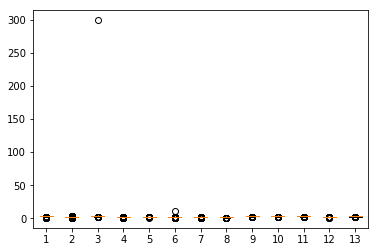

In [465]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [112]:
df=df.drop([227])


In [114]:
df=df.drop([413397])

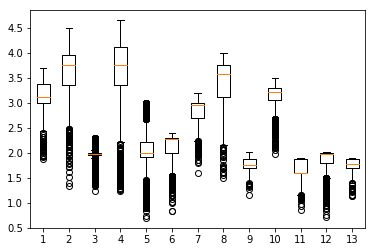

In [115]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [136]:
p1_s211 = df[(df['produkt']=='p1') & (df['sklep']=='s211')]
p1_s211 = p1_s211.sort_values(by='tydzien')

In [138]:
p1_s211.shape[0]

103

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

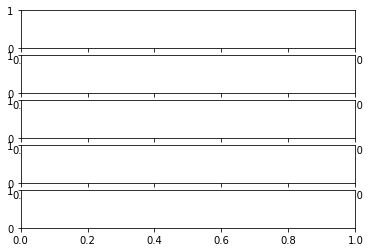

In [186]:
fig, ax = plt.subplots(nrows=13)
ax.plot(range(p1_s211.shape[0]), p1_s211['cena'] * 1000)
ax.plot(range(p1_s211.shape[0]), p1_s211['sprzedaz'])
fig.set_size_inches([12, 4])
plt.show()

In [230]:
df.head()

,produkt,sklep,Tydzień,sprzedaż (szt.),cena,ekspozycja TYP1,ekspozycja TYP2,ekspozycja TYP3,ekspozycja TYP4,ekspozycja TYP5,ekspozycja TYP6,ekspozycja TYP7,ekspozycja TYP8,ekspozycja TYP9
0,p1,s211,2017-08-24,608,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p1,s211,2017-08-31,548,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p1,s211,2017-09-07,1062,2.90481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p1,s211,2017-09-14,895,2.95618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p1,s211,2017-09-21,768,3.1722,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
scaler = StandardScaler()
c = p1_s211['cena'].values.reshape(-1, 1)
scaler.fit(c)
c_norm = scaler.transform(c)

In [179]:
scaler = StandardScaler()
s = p1_s211['sprzedaz'].values.reshape(-1, 1)
scaler.fit(c)
s_norm = scaler.transform(s)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


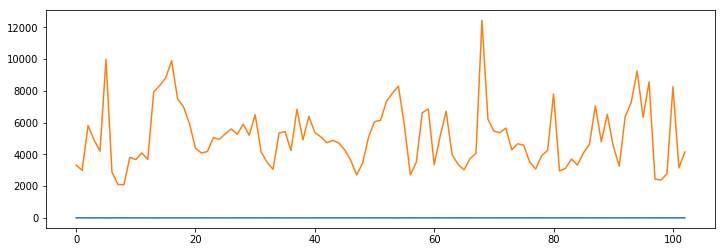

In [180]:
fig, ax = plt.subplots()
ax.plot(range(p1_s211.shape[0]), c_norm)
ax.plot(range(p1_s211.shape[0]), s_norm)
fig.set_size_inches([12, 4])
plt.show()

In [129]:
p1 = df['produkt']=='p1'
s211 = df['sklep']=='s211'
np.all(p1.values, s211.values)

TypeError: only integer scalar arrays can be converted to a scalar index

In [212]:
for i in range(1, 10):
    a = np.unique(np.array((df['typ'+str(i)]).values, dtype=int))
    print('typ'+str(i)+':', a)

typ1: [0 1 2 3 4 5 6]
typ2: [-2  0  1  2  3  4  5]
typ3: [0 1 2 3 5]
typ4: [0 1 2 3 4]
typ5: [0 1 2 3]
typ6: [0 1 2 3 4 5 6 7 8 9]
typ7: [0 1 2 3 4 5 6 9]
typ8: [0 1 2 3 4]
typ9: [ 0  1  2  3  4  5  6  7  8  9 10]


In [208]:
np.array([1, 2, 0.2, -1, 0.7], dtype=int)

array([ 1,  2,  0, -1,  0])

In [17]:
p1_df = df[df['produkt']=='p1']
p1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35775 entries, 0 to 35774
Data columns (total 14 columns):
sprzedaz    35775 non-null int64
produkt     35775 non-null object
sklep       35775 non-null object
tydzien     35775 non-null datetime64[ns]
cena        35775 non-null float64
typ1        35775 non-null float64
typ2        35775 non-null float64
typ3        35775 non-null float64
typ4        35775 non-null float64
typ5        35775 non-null float64
typ6        35775 non-null float64
typ7        35775 non-null float64
typ8        35775 non-null float64
typ9        35775 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 4.1+ MB


In [25]:
aggr_p1 = p1_df.groupby(by='tydzien').sum()
aggr_p1

,sprzedaz,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
tydzien,,,,,,,,,,,
2017-08-17,86436,1090.437021,96.00,1.0,0.0,0.0,1.0,52.00,0.00,0.0,0.0
2017-08-24,61166,1193.664246,12.00,1.0,0.0,0.0,1.0,10.00,0.00,2.0,0.0
2017-08-31,51177,1187.326955,11.00,0.0,0.0,0.0,0.0,2.00,0.00,0.0,0.0
2017-09-07,74299,1012.086711,43.60,2.0,0.0,0.0,1.0,4.00,0.00,0.0,0.0
2017-09-14,75341,1020.937134,49.10,1.0,0.0,1.0,0.0,73.00,0.00,0.0,0.0
2017-09-21,63403,1093.188911,87.00,0.0,0.0,0.0,0.0,65.00,0.00,0.0,0.0
2017-09-28,123176,923.409974,98.25,0.0,0.0,0.0,0.0,101.00,0.00,2.0,0.0
2017-10-05,41813,1198.037121,2.00,0.0,0.0,0.0,0.0,2.00,0.00,0.0,0.0
2017-10-12,42600,1197.929190,6.10,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


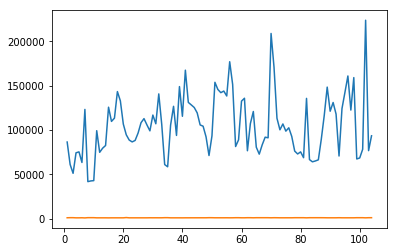

In [30]:
plt.plot(range(1, 105), aggr_p1['sprzedaz'])
plt.plot(range(1, 105), aggr_p1['cena'])


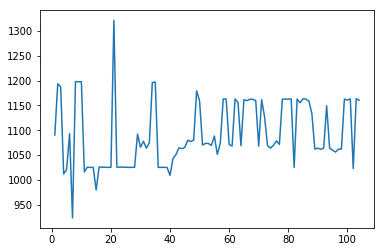

In [31]:
plt.plot(range(1, 105), aggr_p1['cena'])

ValueError: x and y must have same first dimension, but have shapes (104,) and (208,)

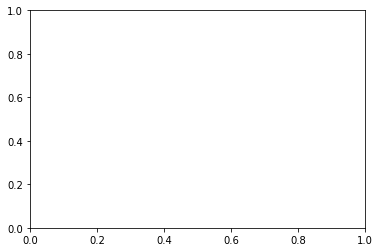

In [39]:
s149 = p1_df[p1_df['sklep']=='s149']
plt.plot(range(1, 105), s149['sprzedaz'])
plt.plot(range(1, 105), s149['cena'])

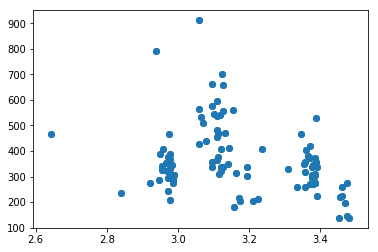

In [43]:
plt.scatter(s149['cena'], s149['sprzedaz'])


In [217]:
lab = LabelEncoder()

lab.fit(df['produkt'])
produkty = lab.transform(df['produkt'])

lab.fit(df['sklep'])
sklepy = lab.transform(df['sklep'])

In [218]:
df['produkt'] = produkty
df['sklep'] = sklepy

In [219]:
df.head(n=2)

,sprzedaz,produkt,sklep,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608,0,125,2017-08-24,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548,0,125,2017-08-31,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
for i in range(1,10):
    print(df['typ'+str(i)].unique(), '\n')

[0.   1.   2.   3.   4.   5.   1.1  0.6  0.75 0.5  1.25 0.7  0.25 1.5
 1.3  1.2  6.   0.34 0.8  0.3  2.2  2.5  0.16] 

[ 0.    1.    5.    2.    0.5   3.    1.5   4.    0.25 -2.  ] 

[0.   1.   0.5  2.   1.5  3.   0.7  0.42 0.34 0.17 2.5  0.3  0.25 1.8
 5.   0.08] 

[0.   1.   2.   3.   0.5  0.17 4.   1.5  0.25 1.3  1.32 0.34 0.33] 

[0.   1.   2.   3.   0.5  0.59 0.8 ] 

[0.   3.   1.   2.   4.   0.17 5.   0.6  0.5  6.   1.5  1.25 0.7  1.8
 1.4  2.5  8.   9.   0.2  1.2  0.8  0.75 0.3  0.25 1.3  1.7  0.4  3.5
 5.5  7.   0.1  2.8 ] 

[0.   1.   2.   6.   3.   4.   0.75 0.7  1.5  1.25 0.3  1.75 2.5  1.2
 1.7  0.6  0.8  0.5  5.   5.5  1.8  1.4  0.25 0.4  0.2  3.5  9.5  3.69
 0.66] 

[0.   1.   2.   0.5  0.25 3.   4.  ] 

[ 0.    1.    4.   10.    3.    6.    5.    2.    8.    7.    9.    1.79] 



In [221]:
ohe = OneHotEncoder(categories='auto', sparse=False)
a = ohe.fit_transform(df[['produkt', 'sklep']])

In [222]:
days = [date.day for date in df['tydzien']]
weeks = [date.week for date in df['tydzien']]
months = [date.month for date in df['tydzien']]
years = [date.year for date in df['tydzien']]

In [223]:
df.insert(column='nr_tyg', loc=3, value=weeks)

In [224]:
df.head(n=2)

,sprzedaz,produkt,sklep,nr_tyg,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608,0,125,34,2017-08-24,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548,0,125,35,2017-08-31,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
X = df.drop(columns=['sprzedaz', 'tydzien', 'produkt', 'sklep']).values
y = df['sprzedaz'].values

In [202]:
X = np.hstack([a, X])

In [276]:
display(X)

array([[34, 3.46542763157895, 0.0, ..., 0.0, 0.0, 0.0],
       [35, 3.37470802919708, 0.0, ..., 0.0, 0.0, 0.0],
       [36, 2.90481167608286, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [30, 1.28659090909091, 0.0, ..., 0.0, 0.0, 0.0],
       [31, 1.38065217391304, 0.0, ..., 0.0, 0.0, 0.0],
       [32, 1.83375, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [299]:
s = df['sprzedaz']=='.'
df[s]


,sprzedaz,produkt,sklep,nr_tyg,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413479,.,4,57,9,2019-02-28,1.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
np.array(types)[0].dtype

AttributeError: type object 'float' has no attribute 'dtype'

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
X_train = np.array(X_train[], dtype='float64')

ValueError: could not convert string to float: '1,69'

In [210]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '1,69'

In [243]:
df['tydzien'] == df['tydzien']

261351    True
258335    True
82575     True
15703     True
324271    True
9775      True
366703    True
398215    True
158183    True
258439    True
47839     True
68015     True
294527    True
303263    True
112527    True
225055    True
192191    True
279343    True
136863    True
366599    True
158079    True
258543    True
90999     True
5511      True
324375    True
47943     True
408199    True
346943    True
366495    True
157975    True
          ... 
319798    True
95574     True
319902    True
95470     True
320006    True
95366     True
320110    True
96198     True
316158    True
319174    True
319070    True
318238    True
97134     True
318342    True
97030     True
318446    True
96926     True
318550    True
96822     True
318654    True
96718     True
318758    True
96614     True
318862    True
96510     True
318966    True
96406     True
409238    True
96302     True
413606    True
Name: tydzien, Length: 413607, dtype: bool

In [242]:
df['tydzien'][0]

Timestamp('2017-08-24 00:00:00')

In [245]:
df['tydzien'][103]

Timestamp('2017-08-17 00:00:00')